In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from iwc2tb.GMI.gmiData import gmiData
import os
from matplotlib import cm
plt.rcParams.update({'font.size': 20})

In [2]:
quantiles         = np.linspace(0.01, 0.99, 50)
imedian            = np.argwhere((quantiles >= 0.49) & (quantiles < 0.51))[0][0]

In [3]:
AY      = []
AY_pre  = []
AY_mean = []
PR      = []
for i in ["0", "1", "2", "3"]:
    
    filename_aro = "qrnn_gmi_nn_lpa_v" + i + ".pickle" 

    with open(filename_aro, "rb") as f:   
        ay      = pickle.load(f)
        ay_pre  = pickle.load(f)
        ay_mean = pickle.load(f)
        pr      = pickle.load(f)

        f.close()
        
    AY.append(ay)
    AY_pre.append(ay_pre.reshape(-1, 1, 50))
    AY_mean.append(ay_mean.reshape(-1, 1))
    PR.append(pr)

AY      = np.concatenate(AY, axis = 1)
AY_pre  = np.concatenate(AY_pre, axis = 1)
AY_mean = np.concatenate(AY_mean, axis = 1)
PR      = np.concatenate(PR, axis = 1)
    
    
    

In [4]:
TY      = []
TY_pre  = []
TY_mean = []

for i in ["0", "1", "2", "3"]:
    
    filename_aro = "qrnn_gmi_nn_lpa_pr1_v" + i + ".pickle" 

    with open(filename_aro, "rb") as f:   
        ty      = pickle.load(f)
        ty_pre  = pickle.load(f)
        ty_mean = pickle.load(f)
        pr      = pickle.load(f)

        f.close()
        
    TY.append(ty)
    TY_pre.append(ty_pre.reshape(-1, 1, 50))
    TY_mean.append(ty_mean.reshape(-1, 1))


TY      = np.concatenate(TY, axis = 1)
TY_pre  = np.concatenate(TY_pre, axis = 1)
TY_mean = np.concatenate(TY_mean, axis = 1)

    
    
    

In [5]:
batchSize          = 256
inputs             = np.array( ["ta", "t2m",  "wvp", "z0", "lat",  "stype"])
outputs            = "iwp"
xlog               = True
latlims            = [0, 45]
latlims            = [0, 65]
test_data          = gmiData(os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train_jan_pr_aro_new.nc"), 
                             inputs,
                             outputs,
                             batch_size = batchSize,
                             latlims = latlims,
                             normalise = None)
                             #log_iwp = xlog)


In [6]:
lat = test_data.lat
lat = np.repeat(lat, AY.shape[1], axis = 1)
tb  = test_data.x[:, :4]

In [7]:
def plot_scatter(amask, figname = "scatter_tb.png"):
    fig, ax = plt.subplots(1, 2, figsize = [15, 6])
    ax = ax.ravel()
    ax[0].scatter(AY, AY_mean, color = "tab:blue", label = "all")
    cs = ax[1].scatter(TY, TY_mean, color = "tab:blue", label = "all")

    x = np.arange(0.0001, 15, 1)
    y = x

    ax[1].scatter(TY[amask], TY_mean[amask], color = "tab:red", alpha = 0.2, label = "subset")
    ax[0].scatter(AY[amask], AY_mean[amask], color = "tab:red", alpha = 0.2, label = "subset")
    ax[0].plot(x, y, "k")
    ax[1].plot(x, y, "k")
    ax[0].set_title("ARO based training")
    ax[1].set_title("TRO based training")
    ax[0].set_xlabel(r"IWP0 [kg m$^{-2}$]")
    ax[0].set_ylabel(r"IWP_mean [kg m$^{-2}$]")

    ax[1].set_xlabel(r"IWP0 [kg m$^{-2}$]")
    ax[1].set_ylabel(r"IWP_mean [kg m$^{-2}$]")
    ax[0].legend()
    ax[1].legend()
    ax[0].set_xlim([0, 20])
    ax[1].set_xlim([0, 20])
    ax[0].set_ylim([0, 20])
    ax[1].set_ylim([0, 20])

    #ax[1].set_yscale("log")
    #ax[1].set_xscale("log")
    #ax[0].set_yscale("log")
    #ax[0].set_xscale("log")
    fig.savefig(figname, bbox_inches = "tight", dpi = 300)

In [8]:
#amask = PR > 1.3
#plot_scatter(amask, "scatter_pr_gt_13.png")

#amask = PR < 1.15
#plot_scatter(amask, "scatter_pr_lt_11.png")



In [9]:
stype = test_data.stype
stype = np.argmax(stype, axis = 1)
stype = np.squeeze(stype)
stype

array([0, 1, 4, ..., 0, 5, 0])

In [10]:
stype = np.repeat(stype.reshape(-1, 1), AY.shape[1], axis = 1)


In [11]:
def plot_scatter_mask(lsmmask, figname):
    fig, ax = plt.subplots(1, 2, figsize = [15, 6])
    ax = ax.ravel()

    x = np.arange(0.0001, 15, 1)
    y = x

    ax[1].scatter(ty[lsmmask], ty_mean[lsmmask], c = pr[lsmmask],
                  vmin = 1.2, vmax = 1.4, alpha = 0.5, label = "subset", cmap = cm.Blues)
    cs = ax[0].scatter(ay[lsmmask], ay_mean[lsmmask], c = pr[lsmmask], 
                       vmin = 1.2, vmax = 1.4, alpha = 0.5, label = "subset", cmap = cm.Blues)
    fig.colorbar(cs, ax = ax)
    ax[0].plot(x, y, "k")
    ax[1].plot(x, y, "k")
    ax[0].set_title("ARO based training")
    ax[1].set_title("TRO based training")
    ax[0].set_xlabel(r"IWP0 [kg m$^{-2}$]")
    ax[0].set_ylabel(r"IWP_mean [kg m$^{-2}$]")

    ax[1].set_xlabel(r"IWP0 [kg m$^{-2}$]")
    ax[1].set_ylabel(r"IWP_mean [kg m$^{-2}$]")
    #ax[0].legend()
    #ax[1].legend()
    ax[0].set_xlim([1e-4, 20])
    ax[1].set_xlim([1e-4, 20])
    ax[0].set_ylim([1e-4, 20])
    ax[1].set_ylim([1e-4, 20])

    #ax[1].set_yscale("log")
    #ax[1].set_xscale("log")
    #ax[0].set_yscale("log")
    #ax[0].set_xscale("log")
    fig.savefig(figname, bbox_inches = "tight", dpi = 300)

In [12]:
def bias(y, y0):
    return np.mean(y-y0)

def mae(y, y0):
    return np.mean(np.abs(y-y0))

def rmsd(y, y0):
    return np.sqrt(np.mean((y-y0)**2))
    



In [13]:
def stats(y, y0):
    
    bias = np.mean(y-y0)
    mae  = np.mean(np.abs(y-y0))
    rms  = np.sqrt(np.mean((y-y0)**2))
    
    return bias, mae, rms

In [14]:
AY.shape

(817508, 4)

In [15]:
statistics_aro = np.zeros([9, 3])
statistics_tro = np.zeros([9, 3])

# all data
statistics_aro[0, :] = stats(AY_mean, AY)
statistics_tro[0, :] = stats(TY_mean, TY)

# PR < 1.15
amask = PR <= 1.15
statistics_aro[1, :] = stats(AY_mean[amask], AY[amask])
statistics_tro[1, :] = stats(TY_mean[amask], TY[amask])

amask = (PR > 1.15) & (PR <= 1.25)
statistics_aro[2, :] = stats(AY_mean[amask], AY[amask])
statistics_tro[2, :] = stats(TY_mean[amask], TY[amask])

amask = PR > 1.25
statistics_aro[3, :] = stats(AY_mean[amask], AY[amask])
statistics_tro[3, :] = stats(TY_mean[amask], TY[amask])


# water
amask = stype == 0
statistics_aro[4, :] = stats(AY_mean[amask], AY[amask])
statistics_tro[4, :] = stats(TY_mean[amask], TY[amask])

# land
amask = stype == 1
statistics_aro[5, :] = stats(AY_mean[amask], AY[amask])
statistics_tro[5, :] = stats(TY_mean[amask], TY[amask])

# snow/seaice
amask = (stype == 2) | (stype == 3) 
statistics_aro[6, :] = stats(AY_mean[amask], AY[amask])
statistics_tro[6, :] = stats(TY_mean[amask], TY[amask])


# water + PR > 1.25
amask = stype == 0
amask1 = PR > 1.3
amask = np.logical_and(amask, amask1)
statistics_aro[7, :] = stats(AY_mean[amask], AY[amask])
statistics_tro[7, :] = stats(TY_mean[amask], TY[amask])

# land + PR > 1.25
amask = stype == 1
amask1 = PR > 1.3
amask = np.logical_and(amask, amask1)
statistics_aro[8, :] = stats(AY_mean[amask], AY[amask])
statistics_tro[8, :] = stats(TY_mean[amask], TY[amask])

statistics_aro = np.round(statistics_aro, decimals = 3)
statistics_tro = np.round(statistics_tro, decimals = 3)

In [16]:
import pandas as pd

DF_aro = pd.DataFrame(statistics_aro, columns = ["Bias", "MAE", "RMSD"], 
                  index = ["all","pr < 1.15", "pr > 1.15 & pr < 1.25", 
                   "pr > 1.25", "water", "land", "snow/seaice", "water + pr > 1.25",
                           "land + pr > 1.25"])

DF_tro = pd.DataFrame(statistics_tro, columns = ["Bias", "MAE", "RMSD"], 
                  index = ["all", "pr < 1.15", "pr > 1.15 & pr < 1.25", 
                   "pr > 1.25", "water", "land", "snow/seaice", "water + pr > 1.25",
                          "land + pr > 1.25"])

In [17]:
DF_aro

,Bias,MAE,RMSD
all,-0.003,0.038,0.239
pr < 1.15,-0.004,0.041,0.273
pr > 1.15 & pr < 1.25,-0.004,0.036,0.239
pr > 1.25,-0.001,0.036,0.197
water,-0.004,0.037,0.251
land,0.006,0.032,0.180
snow/seaice,-0.002,0.047,0.205
water + pr > 1.25,0.001,0.034,0.178
land + pr > 1.25,0.008,0.028,0.149


In [18]:
DF_tro

,Bias,MAE,RMSD
all,0.005,0.044,0.273
pr < 1.15,-0.003,0.041,0.267
pr > 1.15 & pr < 1.25,0.004,0.040,0.260
pr > 1.25,0.015,0.050,0.288
water,0.004,0.044,0.290
land,0.018,0.038,0.223
snow/seaice,-0.005,0.044,0.185
water + pr > 1.25,0.018,0.050,0.295
land + pr > 1.25,0.030,0.044,0.278


In [19]:
def plot_stats(amask1, fig, ax, c, offset, labels, figname = "statistics.png"):
    statistics_aro = np.zeros([prbins.size - 1, 3])
    statistics_tro = np.zeros([prbins.size - 1, 3])
    npr            = np.zeros([prbins.size - 1])
    for i in range(1, prbins.size):
        amask = ipr == i
        amask = np.logical_and(amask, amask1)
        statistics_aro[i-1, :] = stats(AY_mean[amask], AY[amask])
        statistics_tro[i-1, :] = stats(TY_mean[amask], TY[amask])
        npr[i-1]               = np.sum(amask)

    DF_tro = pd.DataFrame(statistics_tro, columns = ["Bias", "MAE", "RMSD"], 
                      index = prcenter)
    DF_aro = pd.DataFrame(statistics_aro, columns = ["Bias", "MAE", "RMSD"], 
                      index = prcenter)


    ax = ax.ravel()

    for i, key in enumerate(["Bias", "MAE", "RMSD" ]):

        ax[i].plot(DF_tro[key], "-o", color = c, label = labels[0])
        ax[i].plot(DF_aro[key], "--o", color = c, label = labels[1])
        ax[i].legend()
        ax[i].set_ylabel(key + " [kg/m2]")
        ax[i].set_xlabel("pratio-gmi")

        plt.tight_layout(pad = 0.5)
    ax[3].bar(prcenter + offset, npr, width = 0.02 , color = c)  
    ax[3].set_xlabel("pratio-gmi")
    ax[3].set_ylabel("counts")
  

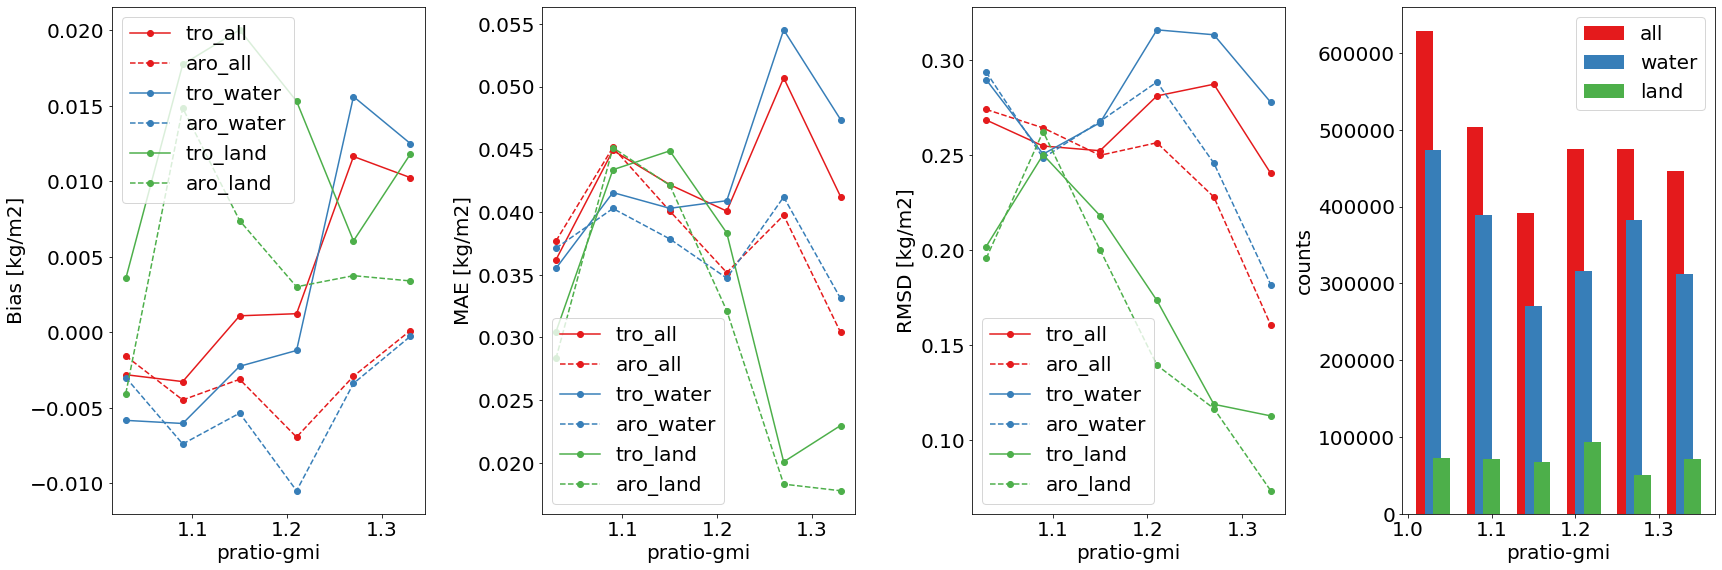

In [20]:
prbins   = np.arange(1, 1.4, 0.06)
prcenter = (prbins[1:] + prbins[:-1]) * 0.5

ipr   = np.digitize(PR, prbins)
npr   = np.zeros([prbins.size])


fig, ax = plt.subplots(1, 4, figsize = [24, 8])

amask1 = stype > -1

colors = ["#e41a1c", "#377eb8", "#4daf4a"]

#984ea3
#ff7f00
#ffff33
#a65628
#f781bf]
plot_stats(amask1, fig, ax ,c = colors[0], offset = -0.01, labels = ["tro_all", "aro_all"],
           figname = "statistics_all.png")


amask1 = stype == 0
plot_stats(amask1, fig, ax, c = colors[1], offset = 0, labels = ["tro_water", "aro_water"],
           figname = "statistics_water.png")

amask1 = stype == 1
plot_stats(amask1, fig, ax, c = colors[2], offset = 0.01, labels = ["tro_land", "aro_land"],
           figname = "statistics_land.png")


ax[3].legend(["all", "water", "land"])
fig.savefig("statistics_surfacetype.png", bbox_inches = "tight")  

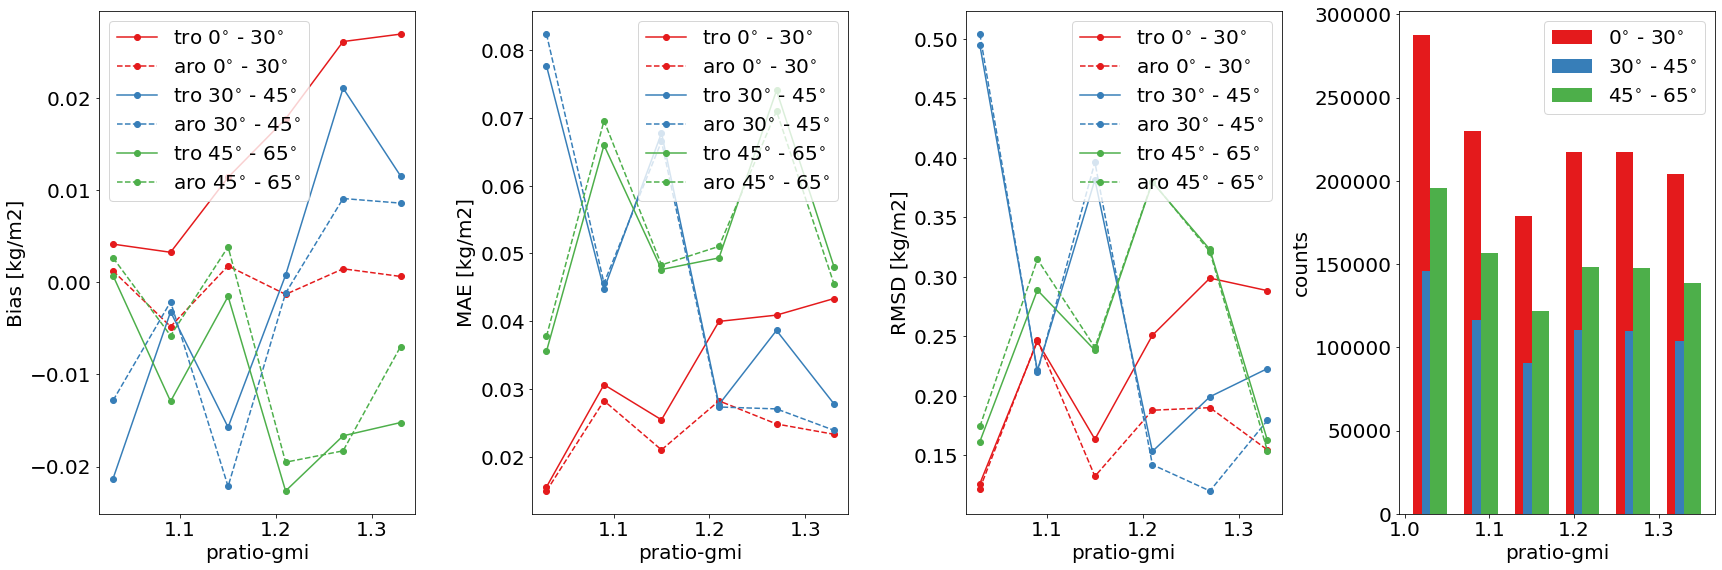

In [21]:
fig, ax = plt.subplots(1, 4, figsize = [24, 8])
amask1 = np.abs(lat) <= 30.0
plot_stats(amask1, fig, ax,  c = colors[0], offset = -0.01, labels = [r"tro 0$^{\circ}$ - 30$^{\circ}$",
                                             r"aro 0$^{\circ}$ - 30$^{\circ}$"
                                            ])


amask1 = (np.abs(lat) > 30) & (np.abs(lat) <= 45)
plot_stats(amask1, fig, ax,  c = colors[1], offset = 0, labels = [r"tro 30$^{\circ}$ - 45$^{\circ}$",
                                             r"aro 30$^{\circ}$ - 45$^{\circ}$"
                                            ])

amask1 = (np.abs(lat) > 45) 
plot_stats(amask1, fig, ax, c = colors[2], offset = 0.01, labels = [r"tro 45$^{\circ}$ - 65$^{\circ}$",
                                             r"aro 45$^{\circ}$ - 65$^{\circ}$"
                                            ])

ax[3].legend([r"0$^{\circ}$ - 30$^{\circ}$", 
              r"30$^{\circ}$ - 45$^{\circ}$",
              r"45$^{\circ}$ - 65$^{\circ}$"])
fig.savefig("statistics_latitudes.png", bbox_inches = "tight")

In [22]:
def three_sigma(tb):
    """
    three sigma rule to classify cloudy and clear-sky tb
    

    Parameters
    ----------
    tb : 183+-3 GHz 

    Returns
    -------
    mask : scalar, the threshold value
    """
    bins = np.arange(100, 310, 1)
    hist = np.histogram(tb, bins, density = True)


    mids = 0.5*(bins[1:] + bins[:-1])

    tbmean = np.sum(hist[0] * mids)

    sd  = np.sqrt(np.sum(hist[0] * (mids - tbmean)**2))

    tbmax = mids[np.argmax(hist[0])]
    
    mask = tbmax-3*sd

    return mask

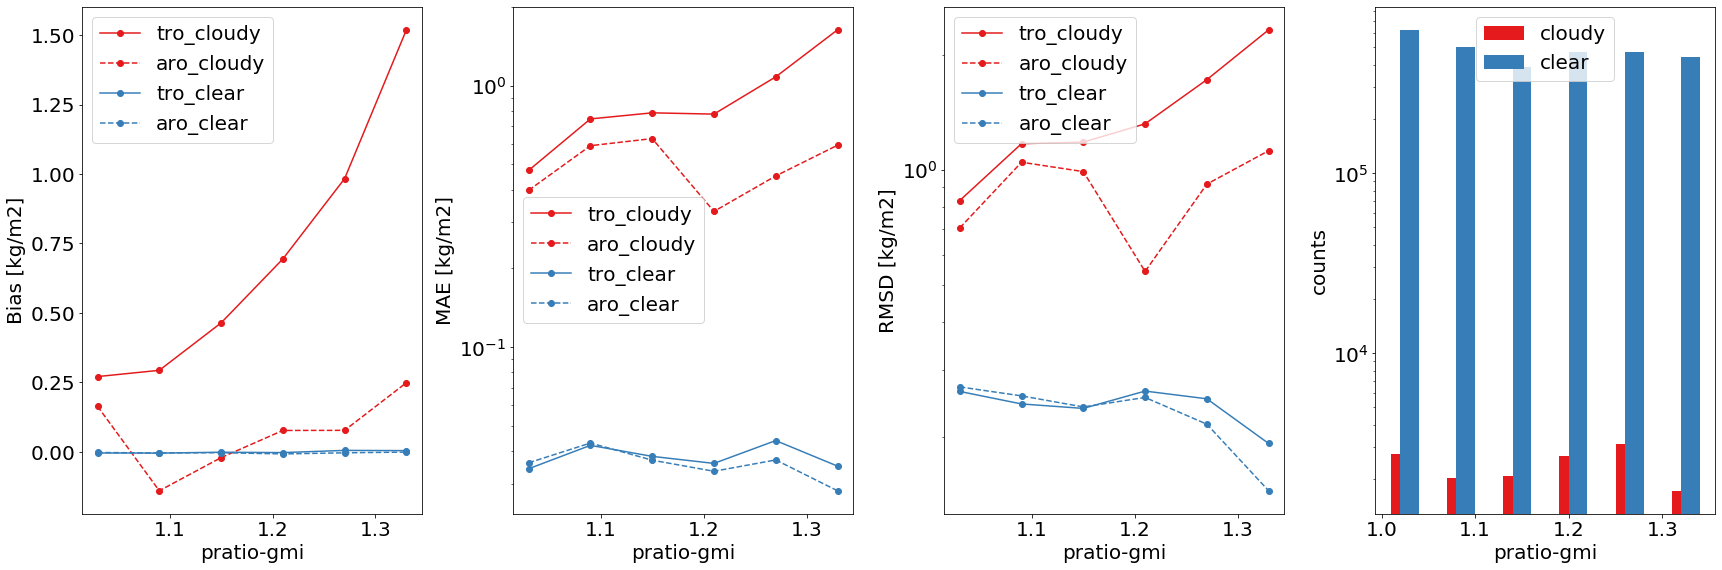

In [23]:
tbt    = three_sigma(tb)
amask1 = tb[:, 3] < tbt
fig, ax = plt.subplots(1, 4, figsize = [24, 8])
amask1 = np.repeat(amask1.reshape(-1, 1), 4, axis = 1)
plot_stats(amask1, fig, ax, c = colors[0], labels = ["tro_cloudy", "aro_cloudy"], offset = -0.01)

amask1 = tb[:, 3] > tbt

amask1 = np.repeat(amask1.reshape(-1, 1), 4, axis = 1)

plot_stats(amask1, fig, ax, c = colors[1], labels = ["tro_clear", "aro_clear"], offset = 0,)

ax[3].legend(["cloudy", "clear"])
ax[3].set_yscale("log")
ax[1].set_yscale("log")
ax[2].set_yscale("log")
fig.savefig("statistics_cloudyclear.png", bbox_inches = "tight")

In [24]:
def PDF_uncertainty_bins(y_pre, y0, ulim):
    dtb =(y_pre[:, imedian] - y0)
    uncertain = y_pre[:, -13] - y_pre[:, 12]

    
    im = uncertain <= ulim[0]
    print (np.sum(im), uncertain.max(), uncertain.min())
    bins = np.arange(-12.5, 15., 0.8)
    hist0 = np.histogram(dtb[im], bins, density = True)
    
    
    im = np.logical_and((uncertain < ulim[1]), ( uncertain >= ulim[0]) )
    hist1 = np.histogram(dtb[im], bins, density = True)
 
  
    im = uncertain >=ulim[1]
    hist2 = np.histogram(dtb[im], bins, density = True)
    
    
    return hist0[0], hist1[0],  hist2[0], bins

def count_true_events(y_pre, y0, ulim):
    
    dtb =(y_pre[:, 3] - y0)
    uncertain = y_pre[:, 5] - y_pre[:, 1]
 #I1V
    #ulim = [3, 4] #I2V
    #ulim = [1, 1.5 ]#I3V
    
    im = uncertain <= ulim[0]
    
    mask = np.logical_and(y0[im] >= y_pre[im, 1],  y0[im] <= y_pre[im, 5])
    icount1 = np.sum(mask)
    icount1 = icount1/np.sum(im) * 100
    
    
    im = np.logical_and((uncertain < ulim[1]), ( uncertain >= ulim[0]) )
    mask = np.logical_and(y0[im] >= y_pre[im, 1],  y0[im] <= y_pre[im, 5])
    icount2 = np.sum(mask)
    icount2 = icount2/np.sum(im) * 100
    
 
  
    im = uncertain >=ulim[1]
    mask = np.logical_and(y0[im] >= y_pre[im, 1],  y0[im] <= y_pre[im, 5])
    icount3 = np.sum(mask)
    icount3 = icount3/np.sum(im) * 100
    
    return np.round(icount1, 1), np.around(icount2, 1), np.round(icount3,1)
    

In [25]:
def sharpness(y, mask = None):
    if mask is not None:
        s = np.mean((y[mask, -2] - y[mask, 1])/y[mask, imedian])
    else:
        s = np.mean((y[:, -2] - y[:, 1])/y[:, imedian])        
    return s

In [26]:
sharpness(AY_pre, amask)

48.677414

In [27]:
sharpness(TY_pre, amask)

61.451996

In [28]:
def calibration(y_pre, y):
    n_intervals = len(quantiles)//2
    qs = quantiles
    total = 0.0
    intervals = np.array([q_r - q_l for (q_l, q_r) in zip(qs, reversed(qs))])[:n_intervals]
    counts = np.zeros(n_intervals)
    
    for i in range(n_intervals):
        l = y_pre[:, i]
        r = y_pre[:, -(i + 1)]
        counts[i] += np.logical_and(y >= l, y < r).sum()

    total += np.prod(y.size)

    return intervals[::-1], (counts / total)[::-1]


In [29]:
amask = stype == 0
amask1 = np.abs(lat) <= 30.0

amask = np.logical_and(amask, amask1)

In [30]:
def aic(y_pre, y, iupper, ilower, interval):
    upper      = y_pre[:, iupper]
    lower      = y_pre[:, ilower]
    alpha      = 1 - interval/100

    truevalues = y
    I1         = np.where(truevalues < lower, 1, 0)
    I2         = np.where(truevalues > upper, 1, 0)
    
    score      = (upper - lower) + 2/alpha * (lower - truevalues) * I1 + 2/alpha * (truevalues - upper) * I2
    
    return np.mean(score)


In [31]:
amask = stype == 0
amask1 = np.abs(lat) <= 30.0

amask = np.logical_and(amask, amask1)

In [32]:
ay_pre = AY_pre.reshape(-1, 50)
ty_pre = TY_pre.reshape(-1, 50)
ay     = AY.ravel()
ty     = TY.ravel()
mask   = amask.ravel()


In [33]:
ascores = []
tscores = []
ascores_all = []
tscores_all = []
intervals = []
for i in range(25):
    ilower = i
    iupper = -1 - i
    interval = (quantiles[iupper] - quantiles[ilower]) * 100
    
    intervals.append(interval)
    
    ascores.append(aic(ay_pre[mask, :], ay[mask], iupper, ilower, interval))
    tscores.append(aic(ty_pre[mask, :], ty[mask], iupper, ilower, interval))
    ascores_all.append(aic(ay_pre, ay, iupper, ilower, interval))
    tscores_all.append(aic(ty_pre, ty, iupper, ilower, interval))

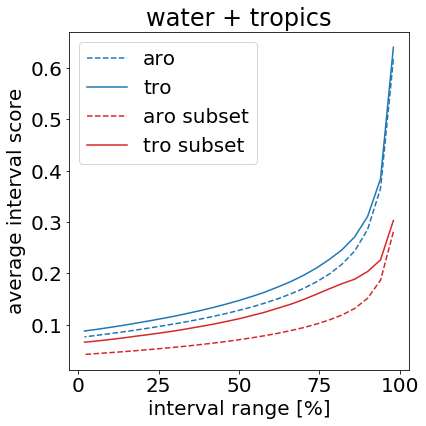

In [34]:
fig, ax = plt.subplots(1, 1, figsize = [6, 6])
ax.plot(intervals, ascores_all, "--", label = "aro", color = "tab:blue")
ax.plot(intervals, tscores_all, "-", label = "tro", color = "tab:blue")
ax.plot(intervals, ascores, "--", label = "aro subset", color = "tab:red")
ax.plot(intervals, tscores, "-", label = "tro subset", color = "tab:red")
ax.legend()
ax.set_xlabel("interval range [%]")
ax.set_ylabel("average interval score")
ax.legend()
ax.set_xlabel("interval range [%]")
ax.set_ylabel("average interval score")
#ax.set_title("All data")
ax.set_title("water + tropics")
plt.tight_layout(pad = 0.5)
fig.savefig("AIS.png", bbox_inches = "tight", dpi = 300)

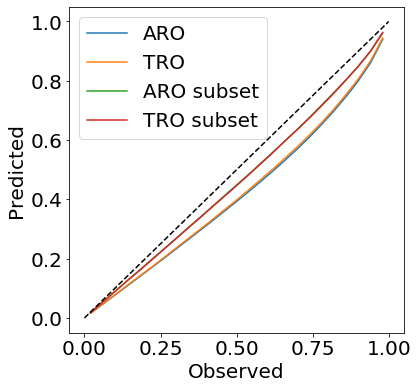

In [35]:
fig, ax = plt.subplots(1,1, figsize = [6, 6])


inter, fre = calibration(ay_pre, ay )

ax.plot(inter, fre, label = "ARO")

inter, fre = calibration(ty_pre, ty )

ax.plot(inter, fre, label = "TRO")

inter, fre = calibration(ay_pre[mask, :], ay[mask] )

ax.plot(inter, fre, label = "ARO subset")

inter, fre = calibration(ty_pre[mask, :], ty[mask] )

ax.plot(inter, fre, label = "TRO subset")

ax.legend()
y = np.arange(0, 1.2, 0.2)
x = y

ax.plot(x, y, "k--")
ax.set_xlabel("Observed")
ax.set_ylabel("Predicted")
fig.savefig("calibration.png", bbox_inches = "tight", dpi = 300)

In [36]:
def zonal_mean(lat, iwp, latbins):
    

    bins     = np.digitize(lat, latbins)
    
    nbins    = np.bincount(bins)
    iwp_mean = np.bincount(bins, iwp)
    
    return iwp_mean, nbins

In [37]:
latbins = np.arange(-65, 65, 1.5)

iwp_tro, counts_t = zonal_mean(lat.ravel(), TY_mean.ravel(), latbins)
iwp_aro, counts_a = zonal_mean(lat.ravel(), AY_mean.ravel(), latbins)



Text(0, 0.5, 'Latitude')

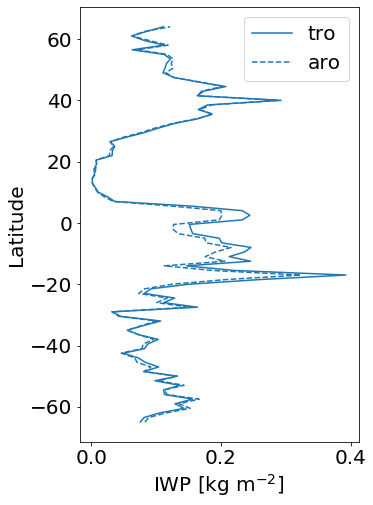

In [38]:
fig, ax = plt.subplots(1, 1, figsize = [5, 8])
ax.plot( iwp_tro[1:]/counts_t[1:], latbins, "-", color = "tab:blue", label = "tro")
ax.plot( iwp_aro[1:]/counts_a[1:], latbins, "--",color = "tab:blue", label = "aro")
ax.legend()
ax.set_xlabel(r"IWP [kg m$^{-2}$]")
ax.set_ylabel("Latitude")

In [39]:
iwp_aro

array([    0.        ,  2737.92629307,  3558.57476596,  4614.27854399,
        6047.83654969,  5361.8157064 ,  6599.90675793,  4597.88212312,
        4429.94105642,  5611.84107711,  4064.95071896,  5168.61143679,
        3160.50828702,  3585.88789392,  2735.97251662,  2587.63057713,
        1788.79676091,  3029.64660752,  3101.35744641,  3717.29975404,
        2821.09704044,  2135.96909882,  2982.70381809,  3884.70178874,
        1642.46503528,  1210.91912867,  5734.33063933,  3879.88056119,
        4492.60879675,  2801.44283086,  3156.24538559,  4762.58426831,
        7904.64086707, 12426.45799988,  7146.6471607 ,  4304.9976642 ,
        7843.36338769,  6720.65107305,  7275.15261298,  8218.63400544,
        6778.73050985,  6684.32067201,  5128.28905351,  4813.34519563,
        3955.42695814,  7259.37932964,  7408.30954928,  7313.79243803,
        4551.87178249,  1246.31326165,   737.05923028,   352.79066591,
         183.37354356,    48.36410642,    52.97869238,   227.05200623,
      

In [40]:
latbins.shape

(87,)